# Análise Exploratória
Esta etapa do trabalho explorar o dataset para obter informações importantes a respeito do comportamento dos dados para melhor subsidiar o aprendizado de máquina.

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from statsmodels.graphics.correlation import plot_corr

from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import StandardScaler


%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_feather('df_preprocessado.feather')
df.set_index('index', inplace=True)
print('dimensão do dataset:', df.shape)
print('amostra do dataset:')
display(df.head())

dimensão do dataset: (5598785, 22)
amostra do dataset:


desc_eleicao  uf         ue  partido     cargo  candidato  \
index                                                                          
0      Eleições Municipais 2016  RS  SÃO BORJA        7  Vereador     251963   
1      Eleições Municipais 2016  RS  SÃO BORJA        7  Vereador     251963   
2      Eleições Municipais 2016  RS  SÃO BORJA        7  Vereador     251963   
3      Eleições Municipais 2016  RS  SÃO BORJA        7  Vereador     251963   
4      Eleições Municipais 2016  RS  SÃO BORJA        7  Vereador     251963   

      documento data_despesa  dia_despesa semana_despesa  ...  \
index                                                     ...   
0         Outro   2016-08-17         2179     2016-08-15  ...   
1         Outro   2016-08-17         2179     2016-08-15  ...   
2         Outro   2016-08-17         2179     2016-08-15  ...   
3         Outro   2016-08-17         2179     2016-08-15  ...   
4         Outro   2016-08-17         2179     2016-08-15  ...   

      setor_fornecedor  valor                                   tipo_despesa  \
index                                                                          
0                #NULO  100.0  Atividades de militância e mobilização de rua   
1                #NULO  100.0  Atividades de militância e mobilização de rua   
2                #NULO  130.0  Atividades de militância e mobilização de rua   
3                #NULO  130.0  Atividades de militância e mobilização de rua   
4                #NULO  170.0  Atividades de militância e mobilização de rua   

       tipo_despesa_code                descricao_despesa  \
index                                                       
0                      2  militância e mobilização de rua   
1                      2  atividade de mobilização de rua   
2                      2  militância e mobilização de rua   
3                      2                militância de rua   
4                      2  militância e mobilização de rua   

       descricao_wordcount descricao_charcount  descricao_despesa_nulo  \
index                                                                    
0                        5                  32                       0   
1                        5                  31                       0   
2                        5                  32                       0   
3                        3                  17                       0   
4                        5                  31                       0   

       documento_nulo  setor_fornecedor_nulo  
index                                         
0                   0                      1  
1                   0                      1  
2                   0                      1  
3                   0                      1  
4                   0                      1  

[5 rows x 22 columns]

## Estatística Descritiva
Vamos analisar os atributos numéricos, inclusive os de data.

In [4]:
df[['valor','dia_despesa', 'descricao_wordcount', 'descricao_charcount']].describe().T

count         mean           std  min     25%  \
valor                5598785.0   558.260855  20992.804500  0.0    70.0   
dia_despesa          5598785.0  2206.891295     33.217221  0.0  2194.0   
descricao_wordcount  5598785.0     5.631520      3.954199  1.0     2.0   
descricao_charcount  5598785.0    37.316682     24.598883  1.0    17.0   

                        50%     75%         max  
valor                 200.0   500.0  40000000.0  
dia_despesa          2205.0  2220.0      2865.0  
descricao_wordcount     5.0     8.0        33.0  
descricao_charcount    31.0    53.0       100.0

Observa-se aumento substancial entre o __valor de despesa__ do terceiro quartil (75%) para o valor máximo. Vamos aprodundar esta análise no item a seguir. Por outro lado, em relação ao __dia da despesa__ percebe-se um grande desvio entre o valor mínimo e o correspondente a 25%, indicando possíveis anomalias nesta região.

Os atributos de contagem de palabra e de caracteres parecem mais dentro de uma normalidade.
### Atributo "Valor despesa"
Vamos analisar o atributo __Valor despesa__ para identificar _outliers_.

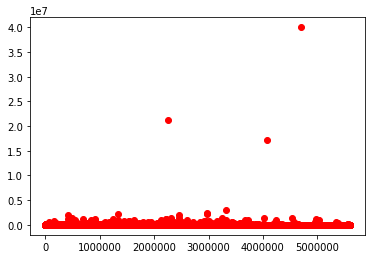

In [5]:
plt.plot(df.index, df['valor'],'or')

Detalharemos os três valores superiores a 15.000.000 reais:

In [12]:
df[df['valor'] > 2000000][['uf', 'ue', 'tipo_despesa', 'descricao_despesa',
                                    'valor']].sort_values(by = 'valor', ascending = False)

uf              ue  \
index                         
4700637  RJ  PARAÍBA DO SUL   
2262842  AL       PIAÇABUÇU   
4072220  AL       PIAÇABUÇU   
3317807  SP       SÃO PAULO   
2966114  AL       PIAÇABUÇU   
1343762  RJ  RIO DE JANEIRO   
2966115  AL       PIAÇABUÇU   
2457571  SP       SÃO PAULO   
406889   PI   QUEIMADA NOVA   

                                              tipo_despesa  \
index                                                        
4700637                      Cessão ou locação de veículos   
2262842                                           Comícios   
4072220      Atividades de militância e mobilização de rua   
3317807  Produção de programas de rádio, televisão ou v...   
2966114      Atividades de militância e mobilização de rua   
1343762  Produção de programas de rádio, televisão ou v...   
2966115      Atividades de militância e mobilização de rua   
2457571  Produção de programas de rádio, televisão ou v...   
406889                        Combustíveis e lubrificantes   

                                         descricao_despesa        valor  
index                                                                    
4700637                          gm/prisma - placa kpu9630  40000000.00  
2262842                  confecção de santinhos e adesivos  21273000.00  
4072220                 fabricação/confeccção de santinhos  17248000.00  
3317807  prestação de serviços (criação e produção de j...   2935202.13  
2966114           fabricação de santinhos e adesivos vinil   2400000.00  
1343762  serviços prestados de produçao de propaganda p...   2250000.00  
2966115                 fabricação de santinhos e adesivos   2250000.00  
2457571  infra estrutura de comunicacao para radio· tv ...   2095750.00  
406889   gasolina comum cód do produto anp: 320102001 u...   2064177.48

Podemos considerar estes valores como anomalia por estarem bem fora do padrão dos demais.

Vamos analisar se podemos considerar estes valores como outliers dentro do tipo de despesa.
#### Tipo despesa 'Cessão ou locação de veículos'

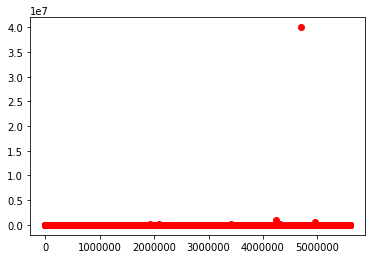

In [13]:
df_filtrado = df[df['tipo_despesa'] == 'Cessão ou locação de veículos']
plt.plot(df_filtrado.index, df_filtrado['valor'],'or')

O valor destoa bastante dos demais.
#### Tipo despesa 'Comícios'

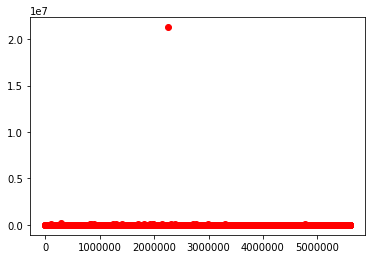

In [14]:
df_filtrado = df[df['tipo_despesa'] == 'Comícios']
plt.plot(df_filtrado.index, df_filtrado['valor'],'or')

O valor destoa bastante dos demais.
#### Tipo despesa 'Atividades de militância e mobilização de rua'

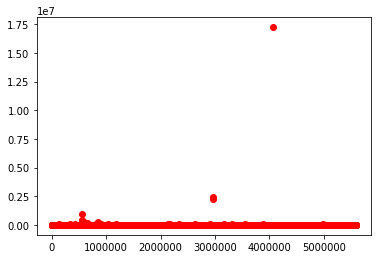

In [16]:
df_filtrado = df[df['tipo_despesa'] == 'Atividades de militância e mobilização de rua']
plt.plot(df_filtrado.index, df_filtrado['valor'],'or')

Alguns valores destoam bastante dos demais.
#### Tipo despesa 'Produção de programas de rádio, televisão ou vídeo'

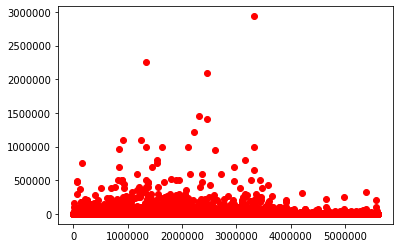

In [3]:
df_filtrado = df[df['tipo_despesa'] == 'Produção de programas de rádio, televisão ou vídeo']
plt.plot(df_filtrado.index, df_filtrado['valor'],'or')

Alguns valores destoam razoavelmente dos demais.
#### Tipo despesa 'Combustíveis e lubrificantes'

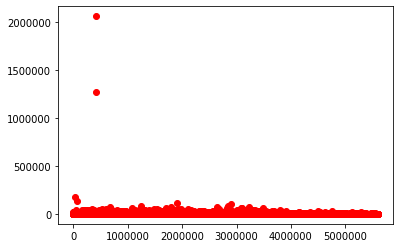

In [4]:
df_filtrado = df[df['tipo_despesa'] == 'Combustíveis e lubrificantes']
plt.plot(df_filtrado.index, df_filtrado['valor'],'or')

Alguns valores destoam bastante dos demais.
### Atributo "Dia da despesa"
Vamos analisar como está da distribuição dos dias das despesas.

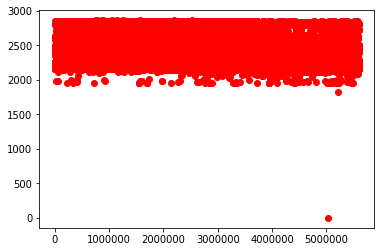

In [9]:
plt.plot(df.index, df['data_despesa'],'or')

In [8]:
dataMin = df['data_despesa'].min()
dataMed = df['data_despesa'].max() - (df['data_despesa'].max() - df[df['data_despesa'] != df['data_despesa'].min()]['data_despesa'].min())/2
dataMax = df['data_despesa'].max()
print('Data mínima:', dataMin)
print('Data média:', dataMed)
print('Data máxima:', dataMax)

Data mínima: 2010-08-30 00:00:00
Data média: 2017-02-01 00:00:00
Data máxima: 2018-07-04 00:00:00


## Correlação
Vamos calcular a correlação entre os atributos numéricos do dataset. Os atributos categóricos serão convertidos para valores númericos.

In [11]:
df.columns

Index(['desc_eleicao', 'uf', 'ue', 'partido', 'cargo', 'candidato',
       'documento', 'data_despesa', 'dia_despesa', 'semana_despesa',
       'mes_despesa', 'fornecedor', 'setor_fornecedor', 'valor',
       'tipo_despesa', 'tipo_despesa_code', 'descricao_despesa',
       'descricao_wordcount', 'descricao_charcount', 'descricao_despesa_nulo',
       'documento_nulo', 'setor_fornecedor_nulo', 'uf_code', 'ue_code',
       'cargo_code', 'documento_code'],
      dtype='object')

In [12]:
df['uf_code'] = df['uf'].cat.codes
df['ue_code'] = df['ue'].cat.codes
df['cargo_code'] = df['cargo'].cat.codes
df['documento_code'] = df['documento'].cat.codes
df['desc_eleicao_code'] = df['desc_eleicao'].cat.codes
df['setor_fornecedor_code'] = df['setor_fornecedor'].cat.codes

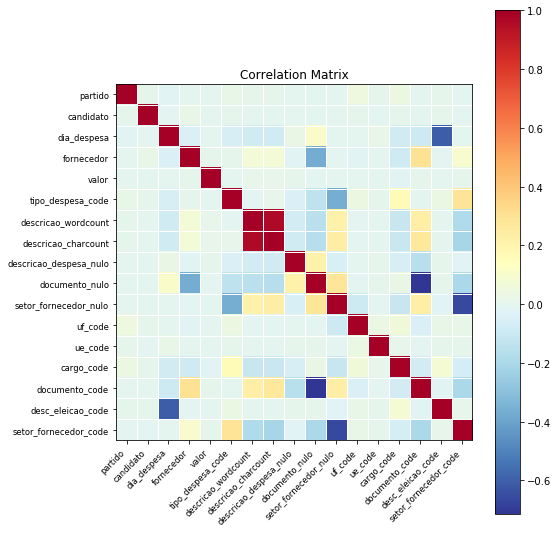

In [16]:
corr = df.corr()

#tamanho figura
n, m = 8, 8

with mpl.rc_context():
    mpl.rc("figure", figsize=(n,m))
    fig=plot_corr(corr,xnames=corr.columns)
    fig.figsize=(15,7)

In [22]:
print('listagem das maiores correlações (valores absolutos):')
display(corr[corr < 1].abs().unstack().sort_values(kind="quicksort", ascending = False).head(20))

listagem das maiores correlações (valores absolutos):


descricao_wordcount    descricao_charcount      0.964022
descricao_charcount    descricao_wordcount      0.964022
documento_nulo         documento_code           0.714830
documento_code         documento_nulo           0.714830
setor_fornecedor_nulo  setor_fornecedor_code    0.657127
setor_fornecedor_code  setor_fornecedor_nulo    0.657127
desc_eleicao_code      dia_despesa              0.604153
dia_despesa            desc_eleicao_code        0.604153
documento_nulo         fornecedor               0.370341
fornecedor             documento_nulo           0.370341
setor_fornecedor_nulo  tipo_despesa_code        0.361880
tipo_despesa_code      setor_fornecedor_nulo    0.361880
fornecedor             documento_code           0.301013
documento_code         fornecedor               0.301013
tipo_despesa_code      setor_fornecedor_code    0.284016
setor_fornecedor_code  tipo_despesa_code        0.284016
documento_nulo         setor_fornecedor_nulo    0.276708
setor_fornecedor_nulo  document

Utilizando as regras estabelecidas por MUKAKA (2012), destacamos as seguintes correlações:
- Morderada correlação entre:
    - dia_despesa e desc_eleicao_code (60%)
- Baixa correlação entre:
    - fornecedor e documento_nulo (37%)
    - tipo_despesa_code e setor_fornecedor_nulo (36%)
    - fornecedor e documento_code (30%)
- Existe correlação insignificante entre:
    - documento_code e descricao_charcount (25%);
    - documento_code e descricao_wordcount (22%);
    - cargo_code e tipo_despesa_code (16%).

## Evolução
Analisaremos a evolução semanal de alguns atributos numéricos ao longo do tempo.

In [23]:
df_hist_mean = df[['data_despesa','valor', 'descricao_wordcount', 'descricao_charcount']]
df_hist_mean = df_hist_mean.groupby([pd.Grouper(key='data_despesa', freq='W-MON')]).mean()
df_hist_mean.rename(columns={'valor': 'valor_mean',
                             'descricao_wordcount': 'descricao_wordcount_mean',
                             'descricao_charcount': 'descricao_charcount_mean'},
                   inplace = True)

In [24]:
df_hist_count = df[['data_despesa']]
df_hist_count = df_hist_count.groupby([pd.Grouper(key='data_despesa', freq='W-MON')])['data_despesa'].count()
df_hist_count = df_hist_count.rename('despesas_count')

In [25]:
df_hist_sum = df[['data_despesa','valor', 'descricao_wordcount', 'descricao_charcount']]
df_hist_sum = df_hist_sum.groupby([pd.Grouper(key='data_despesa', freq='W-MON')]).sum()
df_hist_sum.rename(columns={'valor': 'valor_sum',
                             'descricao_wordcount': 'descricao_wordcount_sum',
                             'descricao_charcount': 'descricao_charcount_sum'},
                   inplace = True)

In [26]:
df_hist = df_hist_mean.join(df_hist_count).join(df_hist_sum).fillna(0)

In [27]:
df_hist.columns

Index(['valor_mean', 'descricao_wordcount_mean', 'descricao_charcount_mean',
       'despesas_count', 'valor_sum', 'descricao_wordcount_sum',
       'descricao_charcount_sum'],
      dtype='object')

### Normalização
Como queremos analisar tendências, vamos normalizar as variáveis computadas:

In [12]:
escalador_valor_mean = MinMaxScaler()
escalador_descricao_wordcount_mean = MinMaxScaler()
escalador_descricao_charcount_mean = MinMaxScaler()
escalador_despesas_count = MinMaxScaler()
escalador_valor_sum = MinMaxScaler()
escalador_descricao_wordcount_sum = MinMaxScaler()
escalador_descricao_charcount_sum = MinMaxScaler()

df_hist_MinMax = df_hist.copy()
df_hist_MinMax['valor_mean'] = escalador_valor_mean.fit_transform(df_hist[['valor_mean']].values)
df_hist_MinMax['descricao_wordcount_mean'] = escalador_descricao_wordcount_mean.fit_transform(df_hist[['descricao_wordcount_mean']].values)
df_hist_MinMax['descricao_charcount_mean'] = escalador_descricao_charcount_mean.fit_transform(df_hist[['descricao_charcount_mean']].values)
df_hist_MinMax['despesas_count'] = escalador_despesas_count.fit_transform(df_hist[['despesas_count']].values)
df_hist_MinMax['valor_sum'] = escalador_valor_sum.fit_transform(df_hist[['valor_sum']].values)
df_hist_MinMax['descricao_wordcount_sum'] = escalador_descricao_wordcount_sum.fit_transform(df_hist[['descricao_wordcount_sum']].values)
df_hist_MinMax['descricao_charcount_sum'] = escalador_descricao_charcount_sum.fit_transform(df_hist[['descricao_charcount_sum']].values)

Plotaremos a seguir os atributos normalizados:

Text(0.5, 1.0, 'Evolução Mensal')

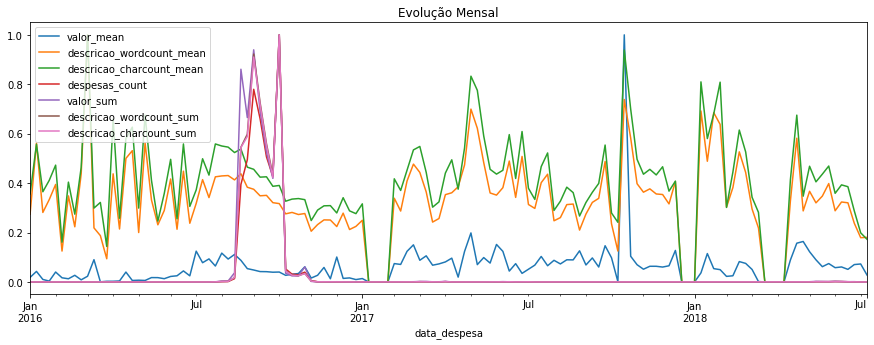

In [13]:
df_hist_MinMax.plot(figsize=(15,5)).set_title("Evolução Mensal")

Analisando o agrupamento mensal das prestações de contas, percebe-se - visualmente - um certo sincronismo entre os atributos médios de valor, descricao_wordcount e descricao_charcount. Vamos analisar a correlação dos dados agora com agrupamento mensal:

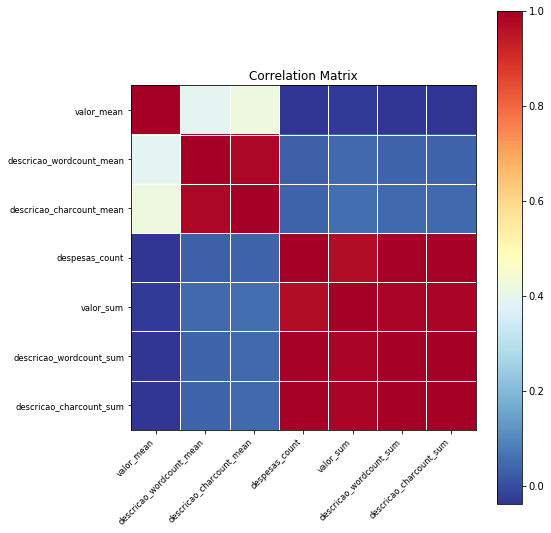

In [14]:
corr_hist = df_hist.corr()

#tamanho figura
n, m = 8, 8

with mpl.rc_context():
    mpl.rc("figure", figsize=(n,m))
    fig=plot_corr(corr_hist,xnames=corr_hist.columns)

Listagem das correlações mais interessantes:

In [15]:
display(corr_hist[corr_hist < 1].abs().unstack().sort_values(kind="quicksort", ascending = False)[14:18])

valor_mean                descricao_charcount_mean    0.422419
descricao_charcount_mean  valor_mean                  0.422419
descricao_wordcount_mean  valor_mean                  0.391075
valor_mean                descricao_wordcount_mean    0.391075
dtype: float64

Segundo MUKAKA (2012), estes valores correspondem a uma baixa correlação. Vamos plotar estes dados de outra forma:

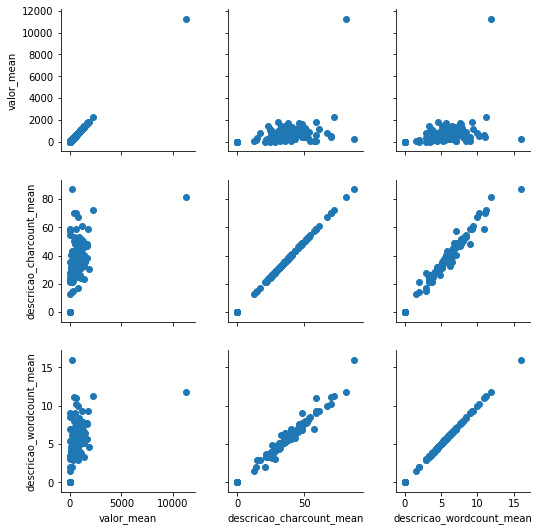

In [21]:
g = sns.PairGrid(df_hist[['valor_mean', 'descricao_charcount_mean', 'descricao_wordcount_mean']])
g.map(plt.scatter);

Analisando os gráficos de correlação  percebe-se melhor quão fraca é esta correlação. Vamos analisar apenas estes três atributos utilizando o __StandardScaler__:

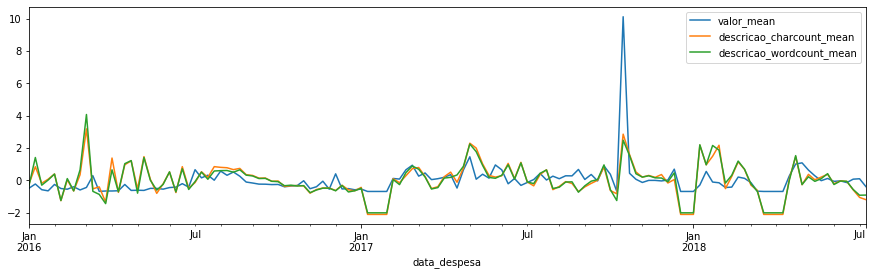

In [18]:
escalador_valor_mean = StandardScaler()
escalador_descricao_wordcount_mean = StandardScaler()
escalador_descricao_charcount_mean = StandardScaler()

df_hist_Std = df_hist.copy()
df_hist_Std['valor_mean'] = escalador_valor_mean.fit_transform(df_hist[['valor_mean']].values)
df_hist_Std['descricao_wordcount_mean'] = escalador_descricao_wordcount_mean.fit_transform(df_hist[['descricao_wordcount_mean']].values)
df_hist_Std['descricao_charcount_mean'] = escalador_descricao_charcount_mean.fit_transform(df_hist[['descricao_charcount_mean']].values)

df_hist_Std[['valor_mean', 'descricao_charcount_mean', 'descricao_wordcount_mean']].plot(figsize=(15,4))
#plt.show()

Vamos analisar agora o desvio padrão dos atributos valor e descricao_wordcount:

In [20]:
df = df.join(df[['mes_despesa', 'valor']].groupby('mes_despesa').count(),
        on = 'mes_despesa',
        rsuffix='_qtde_mes')

df.rename(columns={'valor_qtde_mes': 'qtde_despesa_mes'}, inplace=True)

In [21]:
escalador_valor = StandardScaler()
escalador_descricao_wordcount = StandardScaler()
escalador_qtde_despesa_mes = StandardScaler()

df_hist_STD_mensal = df.copy()
df_hist_STD_mensal['valor'] = escalador_valor.fit_transform(df_hist_STD_mensal[['valor']].values)
df_hist_STD_mensal['descricao_wordcount'] = escalador_descricao_wordcount.fit_transform(df_hist_STD_mensal[['descricao_wordcount']].values)
df_hist_STD_mensal['qtde_despesa_mes'] = escalador_qtde_despesa_mes.fit_transform(df_hist_STD_mensal[['qtde_despesa_mes']].values)

Comparando o valor das despesas com a quantidade de palavras em cada prestação de contas:

In [22]:
df_hist_STD_mensal.set_index('mes_despesa', inplace=True)

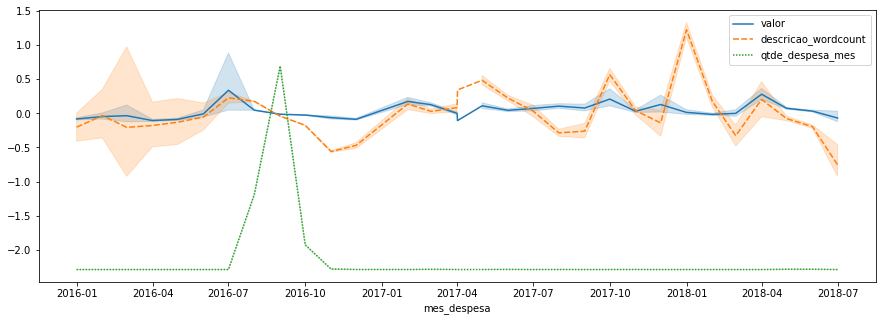

In [23]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(data = df_hist_STD_mensal[['valor', 'descricao_wordcount', 'qtde_despesa_mes']])

## Valor da Prestação de Contas por tipo de Despesa

In [24]:
df_sum_valor_tipo = df[['tipo_despesa', 'valor']].groupby(by='tipo_despesa').mean().sort_values(by = 'valor', ascending=False)

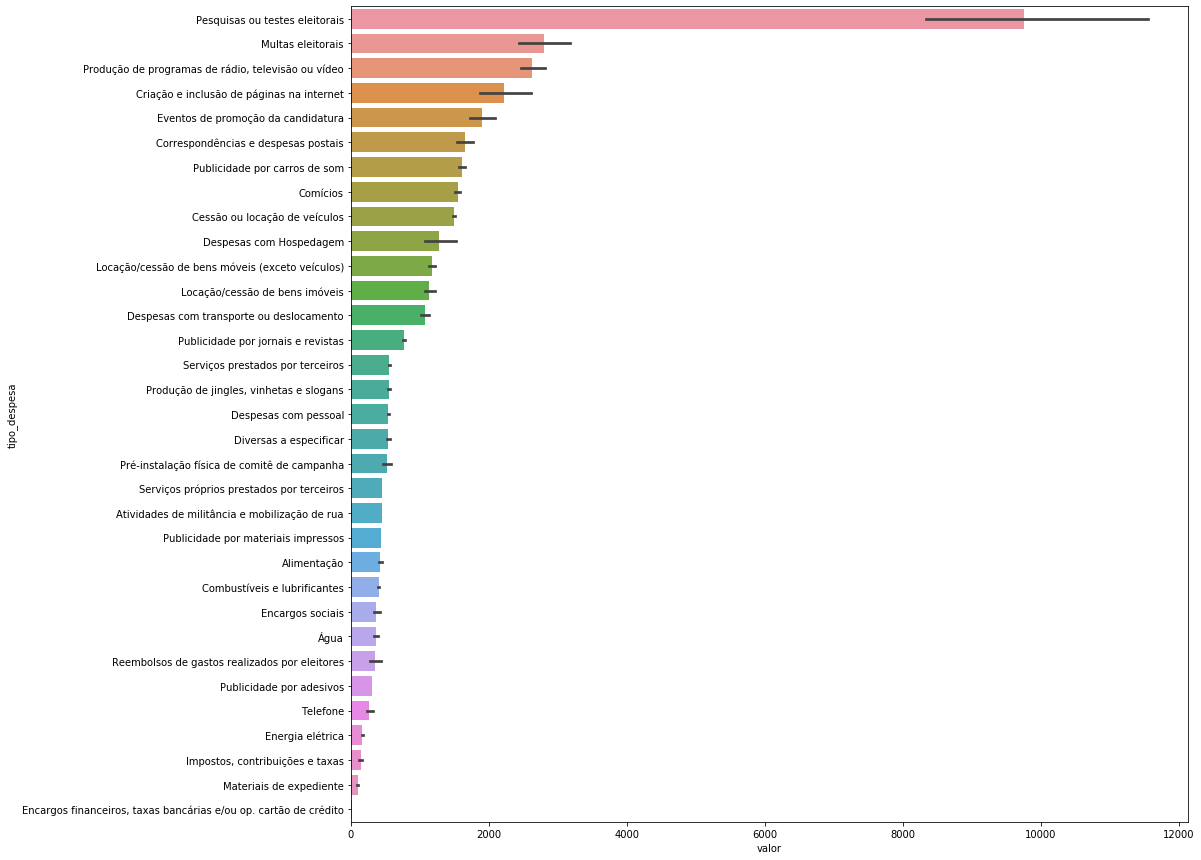

In [25]:
plt.figure(figsize=(15,15))
sns.barplot(y = 'tipo_despesa', x = 'valor', data = df, order = df_sum_valor_tipo.index)

##  Recorrência da categoria X
Esta informação vai ser importante para balancearmos o dataset de treinamento. O atributo categórico que utilizaremos como __X__ no aprendizado de máquina é o __tipo_despesa__.

In [26]:
df.tipo_despesa.value_counts()/df.shape[0]

Publicidade por materiais impressos                                 0.229479
Serviços prestados por terceiros                                    0.120804
Publicidade por adesivos                                            0.109291
Despesas com pessoal                                                0.099276
Combustíveis e lubrificantes                                        0.094884
Atividades de militância e mobilização de rua                       0.079977
Encargos financeiros, taxas bancárias e/ou op. cartão de crédito    0.058929
Cessão ou locação de veículos                                       0.045239
Serviços próprios prestados por terceiros                           0.033853
Diversas a especificar                                              0.028150
Produção de jingles, vinhetas e slogans                             0.018058
Produção de programas de rádio, televisão ou vídeo                  0.014391
Publicidade por carros de som                                       0.013299

In [27]:
print ('Maior recorrência de um categoria:', df[df.tipo_despesa == 'Publicidade por materiais impressos'].count()[0])

Maior recorrência de um categoria: 1280239


In [28]:
print ('5ª Maior recorrência de um categoria:', df[df.tipo_despesa == 'Combustíveis e lubrificantes'].count()[0])

5ª Maior recorrência de um categoria: 529345


In [29]:
print ('Menor recorrência de um categoria:', df[df.tipo_despesa == 'Multas eleitorais'].count()[0])

Menor recorrência de um categoria: 184


# Referências

__MUKAKA__, M.M. «[Statistics Corner: A guide to appropriate uso of Correlation coefficient in medical research](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/#R4)». Malawai Medical Journal. 2012. Consultado em 8 de abril de 2020.